# Problem 3: Google Playstore Apps Dataset (63 points)

# Preprocessing (28 pts)

In [176]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame
from matplotlib import pyplot as plt

In [177]:
file = 'GooglePlaystore.xlsx'
df = pd.read_excel(file)
print(df.shape)
df.info()
df.head(5)
#print(df.info())


(10841, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up


## 3.1.1: Often there are outliers which do not match the overall data type. There is one record in this data where the "Reviews" has value "3.0M" which does not match the rest of the data. Remove that record.

In [178]:
#Prob 3.1
df = df.loc[df['Reviews'] != '3.0M']
print(df.shape)

(10840, 13)


## 3.1.2: Remove rows where any of the columns has the value "Varies with device".

In [179]:
#Prob 3.2
df = df[~df.eq('Varies with device').any(1)]
print(df.shape)
df

(9059, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1 and up


## 3.1.3: The values in the Android version column should be floats. Strip the trailing non-numeric characters from all values (ie. the words " and up"), so the result is a number. If there are multiple decimal places (eg. "x.y.z"), keep only the first two parts (eg "x.y"). For example, the value "4.1 and up" should be changed to "4.1". The value "4.5.6 and up" should be changed to "4.5". The value "5.6.7" should be changed to "5.6". If there is a range (eg. 5.0 - 8.0), only consider the first number. For example, the value "5.0 - 8.0" should be changed to "5.0". The value "4.0.3 - 7.1.1" should be changed to "4.0".

In [180]:
#Prob 3.3
import re

def extractVal(str1):
    ver = re.compile(r""" \s*(?P<version>\d+.?\d?)""", re.VERBOSE)
    res = ver.match(str1)
    return float(res.groupdict()['version'])

#res = ver.match('4.0.3 and up')
#res = ver.match(df['Android Ver'][3])
#print(ver.match(df['Android Ver'][1]).groups())
#print(res.groups())
#print(type(res.groups()[0]))
df['Android Ver'] = df['Android Ver'].map(lambda x: extractVal(x) if pd.notnull(x) else x)
#df.info()

## 3.1.4: The "Installs" column must have integer values. For values that have commas, remove the commas. For values that have a '+' at the end, remove the '+'. Keep only those rows that have an integer value after these edits.

In [181]:
#Prob 3.4
#new_vals = [str.replace(l, '') for str in df['Installs'] if l in ',+']
#new_vals
pun = ',+'
df['Installs']=df['Installs'].str.replace(',','', regex = True)
df['Installs']=df['Installs'].str.replace('+', '', regex = True)
#df['Installs']=df['Installs'].map(lambda x: int(x) if x else )
#print(df.info())
df[df['Installs'].apply(lambda x: str(x).isdigit())]
df['Installs'] = df['Installs'].astype(int)
#print(df.info())
#print(list(df['Installs']))
#print(df.info())
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3


## 3.1.5: For missing rating values, if the number of reviews is less than 100 and installations is less than 50000, remove the row. Else, fill the missing value with the average value (rounded to 2 decimal places) for the Category of that row.

In [182]:
#Prob 3.5
df.drop(index=df[df['Rating'].isnull() & (df['Reviews'] < 100) & (df['Installs'] < 50000)].index, inplace = True)
df['Rating'] = df.groupby(['Category'])['Rating'].apply(lambda x: x.fillna(round(x.mean(),2)))
#print(df.info())
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000,Free,0,Everyone,Art & Design,2018-04-26 00:00:00,1.1,4.0
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000,Free,0,Everyone,Art & Design,2018-06-14 00:00:00,6.1.61.1,4.2
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0,Everyone,Art & Design,2017-09-20 00:00:00,2.9.2,3.0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000,Free,0,Everyone,Art & Design;Creativity,2018-07-03 00:00:00,2.8,4.0
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,28M,1000000,Free,0,Everyone,Art & Design,2017-10-27 00:00:00,1.0.4,4.1


## 3.1.6: Preprocess the Size column to convert the "M" (millions) and "K" (thousands) values into integers. For instance, 8.7M should be converted to 8700000 and 2.4K should be converted to 2400.

In [183]:
#Prob 3.6
def convertSize(x):
    if x[-1].upper() == 'K':
        res = float(x[:-1])*1000
    elif x[-1].upper() == 'M':
        res = float(x[:-1])*1000000
    else: res = x
    return int(res)

df['Size'] = df['Size'].map(lambda x: convertSize(x))
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000000,50000,Free,0,Everyone,Art & Design,2018-04-26 00:00:00,1.1,4.0
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000000,1000000,Free,0,Everyone,Art & Design,2018-06-14 00:00:00,6.1.61.1,4.2
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000000,1000000,Free,0,Everyone,Art & Design,2017-09-20 00:00:00,2.9.2,3.0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100000,10000,Free,0,Everyone,Art & Design;Creativity,2018-07-03 00:00:00,2.8,4.0
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,28000000,1000000,Free,0,Everyone,Art & Design,2017-10-27 00:00:00,1.0.4,4.1


# Analysis (19 pts)

## 3.2.1: Describe (use DataFrame describe method) the category wise rating statistics. In other words, for each category, describe the statistics (count, mean, etc.) for ratings in that category.

In [184]:
#3.A.1
df.groupby('Category')['Rating'].describe()
#grouped['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,59.0,4.358644,0.365322,3.2,4.100,4.40,4.700,5.0
AUTO_AND_VEHICLES,62.0,4.146774,0.569935,2.1,3.900,4.25,4.500,4.9
BEAUTY,40.0,4.291750,0.356175,3.1,4.075,4.30,4.525,4.9
BOOKS_AND_REFERENCE,147.0,4.320136,0.453084,2.7,4.100,4.40,4.600,5.0
BUSINESS,246.0,4.119187,0.662586,1.0,3.825,4.30,4.500,5.0
COMICS,49.0,4.154082,0.550363,2.8,3.800,4.40,4.600,5.0
COMMUNICATION,210.0,4.100952,0.502624,1.0,3.900,4.20,4.400,5.0
DATING,174.0,3.957816,0.664204,1.0,3.600,4.10,4.400,5.0
EDUCATION,110.0,4.392636,0.254395,3.5,4.300,4.40,4.600,4.9


## 3.2.2: Extract all "Free" apps from the master data frame. Then write a function that, given a numeric column e.g 'Rating'), will create and return a dataframe for the top 3 free applications in each category based on that column. Call the function on each of the specified columns.

In [185]:
#Prob 3.A.2
freeApps = list(df[df['Type'] == 'Free']['App'])

def top3(col):
    new_df = pd.DataFrame()
    for name, y in df.groupby('Category')[col]:
        topIndexDict = []
        num = 0
        for i in y.sort_values(ascending=False).index:
            topApp = df.loc[i]['App']
            if topApp in freeApps:
                topIndexDict.append({'Category':name, 'App':topApp, col:y.loc[i]})
                num +=1
            if num == 3:
                new_df = new_df.append(topIndexDict)
                break       
    return new_df

df_rating = top3('Rating')
df_rating.head()
df_installs = top3('Installs')
df_installs.head()
df_reviews = top3('Reviews')
df_reviews.head()

,Category,App,Reviews
0,ART_AND_DESIGN,ibis Paint X,224399
1,ART_AND_DESIGN,FlipaClip - Cartoon animation,194216
2,ART_AND_DESIGN,"Canva: Poster, banner, card maker & graphic de...",174531
0,AUTO_AND_VEHICLES,Tickets + PDA 2018 Exam,197136
1,AUTO_AND_VEHICLES,AutoScout24 - used car finder,186648


## 3.2.3: Find the average, maximum and minimum price of the paid applications.

In [186]:
#Prob 3.A.3
n_df = df[df['Type'] == 'Paid']
print("The average price of the paid applications is {}".format(round(n_df.Price.mean(),2)))
print("The maximum price of the paid applications is {}".format(round(n_df.Price.max(),2)))
print("The minimun price of the paid applications is {}".format(round(n_df.Price.min(),2)))

The average price of the paid applications is 15.14
The maximum price of the paid applications is 400
The minimun price of the paid applications is 0.99


# Visualization (16 pts)

## 3.3.1: In the genre column, break the string of genres into a list. For example, ‘Art & Design; Creativity’ should be [‘Art & Design’, Creativity’]. Count the number of applications per genre and display it using a pie chart.

<AxesSubplot:ylabel='App'>

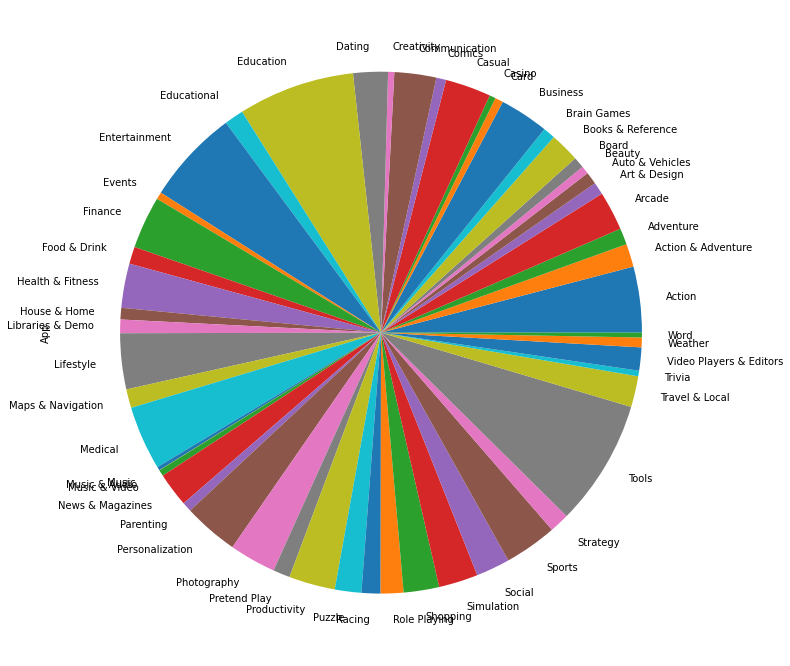

In [187]:
#Prob 3.V.1.
df['Genres'] = df['Genres'].str.split(";", )
df.head()
genres_Apps = df.explode('Genres').groupby('Genres')['App'].count()
genres_Apps.plot(figsize=(12,12), kind='pie')
#.plot(kind='pie', subplots=True)
#regions_cities = df.groupby(['EU', 'coastline'])['city'].count()
#df.head()
#plt.show()

## 3.3.2: Display a box plot of ratings for "Business" and "Education" categories. The boxplots should be in the same plot.

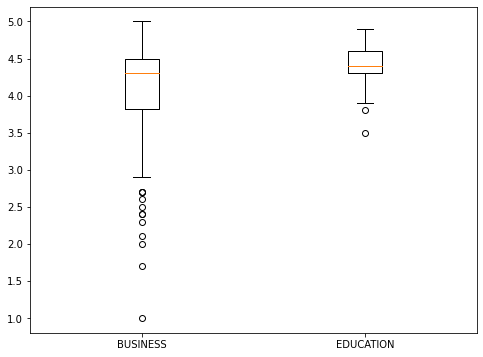

In [188]:
#Prob 3.V.2
grouped = df.groupby('Category')
ser1 = grouped.get_group('BUSINESS')['Rating']
ser2 = grouped.get_group('EDUCATION')['Rating']
plt.figure(figsize=(8,6))
plt.boxplot([ser1, ser2], labels=('BUSINESS', 'EDUCATION'))
plt.show()